In [30]:
import tensorflow as tf
import tensorflow_hub as hub
from PIL import Image
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from scipy.spatial import distance

import os
from os import listdir
import warnings
warnings.filterwarnings("ignore")

import streamlit as st

In [31]:
def extract(file):
  file = Image.open(file).convert('L').resize(IMAGE_SHAPE)
  #display(file)

  file = np.stack((file,)*3, axis=-1)

  file = np.array(file)/255.0

  embedding = model.predict(file[np.newaxis, ...])
  #print(embedding)
  vgg16_feature_np = np.array(embedding)
  flattended_feature = vgg16_feature_np.flatten()

  #print(len(flattended_feature))
  #print(flattended_feature)
  #print('-----------')
  return flattended_feature

In [32]:
model_url = "https://tfhub.dev/tensorflow/efficientnet/lite0/feature-vector/2"

IMAGE_SHAPE = (224, 224)

layer = hub.KerasLayer(model_url)
model = tf.keras.Sequential([layer])

In [33]:


df = pd.DataFrame(columns=['Bild', 'Vektor'])

# get the path/directory
folder_dir = "D:/Python/Bier_Deckel/BierDeckel"
for images in os.listdir(folder_dir):
 
    # check if the image ends with png
    if (images.endswith(".jpg")):
        vector = extract(folder_dir+'/'+images)
        #print(vector.size)
        new_row = {'Bild':images, 'Vektor':vector}
        df = df.append(new_row,ignore_index=True)
        #print(images)

1/1 [==============================] - 0s 23ms/step


In [34]:
df.head()

,Bild,Vektor
0,IMG-20220807-WA0002~2.jpg,"[0.0, 0.0, 0.0606307, 0.0, 0.0, 0.0, 0.0, 0.21..."
1,IMG-20220807-WA0003~2.jpg,"[0.03944593, 0.0, 0.029465782, 0.012463959, 0...."
2,IMG-20220807-WA0004~2.jpg,"[0.0, 0.0, 0.401811, 0.0, 0.0, 0.0, 0.0, 0.049..."
3,IMG-20220807-WA0005~2.jpg,"[0.0, 0.031166213, 0.35513166, 0.08580154, 0.0..."
4,IMG-20220807-WA0006~2.jpg,"[0.0051910635, 0.0, 0.8540805, 0.0047075506, 0..."


In [35]:
df.tail()

,Bild,Vektor
83,IMG_20220806_231724.jpg,"[0.0, 0.11860958, 1.2211034, 0.0, 0.0, 0.10996..."
84,IMG_20220806_231747.jpg,"[0.1306323, 0.0, 1.4365592, 0.0, 0.0, 0.072662..."
85,TestBild.jpg,"[0.0, 0.0, 0.07689003, 0.035674572, 0.09958202..."
86,TestBild2.jpg,"[0.0, 0.20678209, 0.00026524797, 0.0, 0.0, 0.0..."
87,TestBild3.jpg,"[0.0, 0.0, 1.4916626, 0.0074990527, 0.01375091..."


In [36]:
df.Bild[87]

'TestBild3.jpg'

In [37]:
testinput = df.Vektor[87]


In [38]:
testinput

array([0.        , 0.        , 1.4916626 , ..., 0.        , 0.01343313,
       0.        ], dtype=float32)

In [39]:
PicData = pd.DataFrame(columns=['Bild', 'Dist'])
for ind in df.index:
    dc = distance.cdist([testinput], [df.Vektor[ind]], metric='cosine')[0] #cosine
    #print(dc)
    new_row = {'Bild':df.Bild[ind], 'Dist':dc}
    PicData = PicData.append(new_row,ignore_index=True)
PicData.Dist = PicData.Dist.astype('float32')
    

In [40]:
PicData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88 entries, 0 to 87
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Bild    88 non-null     object 
 1   Dist    88 non-null     float32
dtypes: float32(1), object(1)
memory usage: 1.2+ KB


In [41]:
PrintData = PicData.sort_values(by=['Dist']).head(10)



In [42]:
PrintData

,Bild,Dist
87,TestBild3.jpg,0.000000
19,IMG-20220807-WA0021~2.jpg,0.303551
44,IMG_20220806_225443.jpg,0.360818
63,IMG_20220806_231106.jpg,0.377337
86,TestBild2.jpg,0.379353
5,IMG-20220807-WA0007~2.jpg,0.385330
80,IMG_20220806_231648.jpg,0.399590
45,IMG_20220806_225506.jpg,0.400012
4,IMG-20220807-WA0006~2.jpg,0.410801
12,IMG-20220807-WA0014~2.jpg,0.415196


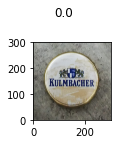

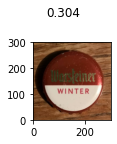

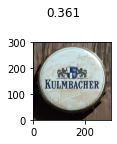

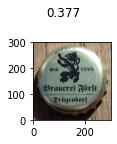

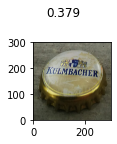

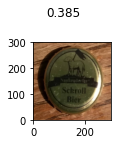

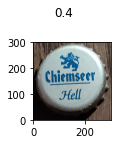

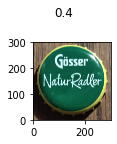

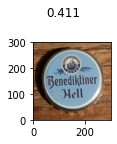

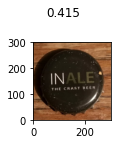

In [43]:
#Über alle Bilder itterieren

for Bild , Dist in PrintData.itertuples(index=False):
    plt.rcParams["figure.figsize"] = [2, 2]
    plt.rcParams["figure.autolayout"] = True
    im = plt.imread("D:/Python/Bier_Deckel/BierDeckel/"+Bild)
    fig, ax = plt.subplots()
    fig.suptitle(np.round_(Dist,decimals=3))
    im = ax.imshow(im, extent=[0, 300, 0, 300])
    plt.show()